# The following are two programs snippets of code designed to assess how much time it takes Python to perfom an arithmetic operation (+ and * particular) involved in the multiplication of two squared matrices. The first snippet simulates the process without the use of arrays of any kind, while the second uses numpy arrays. The results are plotted. 

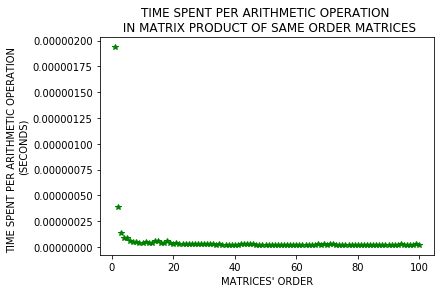

In [2]:
import timeit
import matplotlib.pyplot as plotter

# MATRIX PRODUCT / NATIVE PYTHON, NO ARRAYS.

setup = '''
matrixOrder = {0}
'''
# This statement contains the code to simulate the matrix multiplication of two equally dimensioned squared matrices, 
# the first filled with 1's and the second with 1's.
statement = '''
for i in range(matrixOrder):
    for j in range(matrixOrder):
        total = 0
        for k in range(matrixOrder):
            total = total + 1 * 2
''' 
execTimes = [] # execTimes[i] = The time, in seconds, that it took for an arithmetic
               # operation to be executed in the multiplication of two matrices (the 
               # first filled with 1's and the second with 2's) of order i.  
for i in range(1,101):
    netTime = timeit.timeit(statement, setup.format(i), number=10)
    avgTime = netTime/10
    opTime = avgTime/(2*i**3 - i**2)
    execTimes.append(opTime)
plotter.plot( list(range(1,101)), execTimes, 'g*' )
plotter.xlabel('MATRICES\' ORDER')
plotter.ylabel('TIME SPENT PER ARITHMETIC OPERATION  \n(SECONDS)')
plotter.title('TIME SPENT PER ARITHMETIC OPERATION \n IN MATRIX PRODUCT OF SAME ORDER MATRICES');

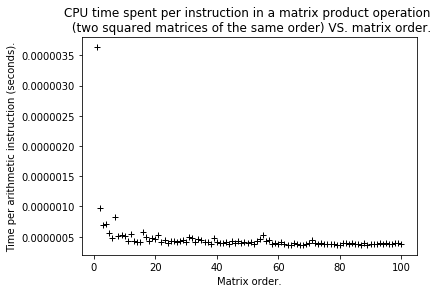

In [6]:
# MATRIX PRODUCT / NUMPY.

# The matrix product algorithm, which uses numpy arrays, is being tested ...
# ... with squared matrices of matrixOrder order, the first filled with 1's, and the 
# second with 2's. Finally, this is returning the time spent per instruction; the 
# instruction count is estimated in 8*matrixOrder^3 + 3*matrixOrder^2, and the 
# execution time is obteined with timeit (50 tests, averaged).        
def measureMatrixProductAlg( matrixOrder ): 
    matrixSetup = '''
matrixOrder = {0}    
import numpy as np
matrixA = np.full( (matrixOrder, matrixOrder), 1 )
matrixB = np.full( (matrixOrder, matrixOrder), 2 )
numRowsA = numRowsB = numColsB = matrixOrder
matrixC = np.zeros((numRowsA, numColsB))
    '''.format( matrixOrder ) 
    matrixProduct = '''
for i in range( numRowsA ): 
    for j in range( numColsB ): 
        total = 0 
        for k in range( numRowsB ):
            total = total + matrixA[i][k] * matrixB[k][j] 
        matrixC[i][j] = total 
    '''
    avgExecTime = timeit.timeit(matrixProduct, setup=matrixSetup, number=10) / 10
    timePerInstruction = avgExecTime / (2*matrixOrder**3 - matrixOrder**2)
    return timePerInstruction

matrixOrderVStimePerInstruction = [measureMatrixProductAlg(i) for i in range(1,101)] # i is matrixOrder.
plotter.plot( list(range(1,101)), matrixOrderVStimePerInstruction, 'k+' )
plotter.xlabel('Matrix order.')
plotter.ylabel('Time per arithmetic instruction (seconds).')
plotter.title('CPU time spent per instruction in a matrix product operation \n (two squared matrices of the same order) VS. matrix order.');
 



# The following are the results of running the above codes in the online server ideone ([2] relates to [4] and [3] ti [5]):

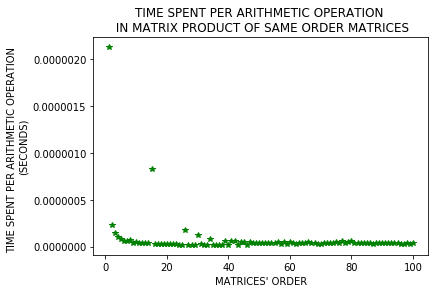

In [4]:
execTimes=[2.123805461451411e-06, 2.3082490467155972e-07, 1.4651114017599157e-07, 1.027892722049728e-07, 7.764798485570483e-08, 6.07378861979779e-08, 6.453736481992191e-08, 7.017551979515702e-08, 4.361779445927041e-08, 5.000563166839512e-08, 3.898429799061129e-08, 3.797276584422531e-08, 3.932852066568369e-08, 3.4782822616609516e-08, 8.288693946154638e-07, 2.811800714557795e-08, 2.5801677566384563e-08, 2.530593508394596e-08, 2.4428172518110897e-08, 2.4326608698361384e-08, 2.342099987811453e-08, 2.3494666776910364e-08, 2.2904204992615382e-08, 2.244537545287713e-08, 2.2212241643241474e-08, 1.7385587073738937e-07, 2.1481152719248926e-08, 2.0903652628489766e-08, 2.098808857507653e-08, 1.2115494353808955e-07, 2.2863072871784895e-08, 2.1589611216248678e-08, 2.0613641300303597e-08, 8.351932681829244e-08, 2.141371781171179e-08, 2.0890880941962808e-08, 2.1593348802523297e-08, 2.0361815298462866e-08, 6.446811136466503e-08, 1.984777688299294e-08, 5.522438728690277e-08, 5.540147594975196e-08, 2.0654008853895545e-08, 5.326126507523721e-08, 4.558409432424415e-08, 1.8369094195431843e-08, 4.459637700308951e-08, 4.163097315934236e-08, 4.0701715353830975e-08, 3.7943197183800165e-08, 3.812126790981394e-08, 3.571145050549996e-08, 3.575826577322366e-08, 3.385173327372514e-08, 3.37795911743628e-08, 4.768226322065727e-08, 3.148775661161986e-08, 4.469887504122239e-08, 3.042268898080569e-08, 4.679854550763241e-08, 4.074180537890361e-08, 2.8827466302842482e-08, 3.856231896575136e-08, 3.667445154214302e-08, 3.695388083493954e-08, 4.892922651487632e-08, 3.6488539400793636e-08, 3.450577597927642e-08, 3.3181874010297166e-08, 3.254097827107607e-08, 4.037527719286928e-08, 3.8716705379981935e-08, 3.7442941225352074e-08, 3.9132436036301095e-08, 4.5926443312947734e-08, 3.5747666298500376e-08, 5.519533752896246e-08, 4.330514188035116e-08, 5.085297248600846e-08, 5.6885607705941e-08, 4.108525543196614e-08, 3.544880439288839e-08, 4.2149714478927435e-08, 3.504652141189352e-08, 3.412291738041528e-08, 3.7671922787619664e-08, 3.2865261330275865e-08, 3.662633648034462e-08, 3.6012853979122556e-08, 3.8509617423886256e-08, 3.530413320693111e-08, 3.839455495428744e-08, 3.581628090118702e-08, 3.6261061636531845e-08, 3.523067757066879e-08, 3.0745202343747516e-08, 2.965136714363326e-08, 3.6019638666584156e-08, 3.258946932253512e-08, 3.362521482397563e-08]
plotter.plot( list(range(1,101)), execTimes, 'g*' )
plotter.xlabel('MATRICES\' ORDER')
plotter.ylabel('TIME SPENT PER ARITHMETIC OPERATION  \n(SECONDS)')
plotter.title('TIME SPENT PER ARITHMETIC OPERATION \n IN MATRIX PRODUCT OF SAME ORDER MATRICES');

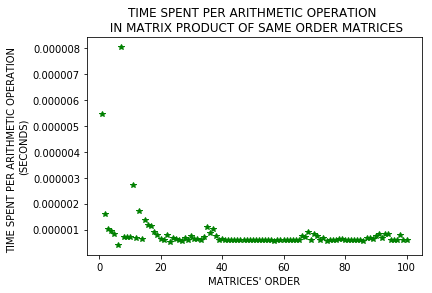

In [5]:
execTimes=[5.470900032378268e-06, 1.618816660690451e-06, 1.0239711102460407e-06, 9.446267857323879e-07, 8.40152444450521e-07, 4.088078281766326e-07, 8.031706436431162e-06, 7.079575000072207e-07, 6.985076253263548e-07, 7.121730525939615e-07, 2.727011491549802e-06, 6.882710145096032e-07, 1.7296444497139403e-06, 6.400026832874469e-07, 1.3877147586154931e-06, 1.1692279233813913e-06, 1.1285386075263916e-06, 9.215555379210291e-07, 7.799729130784526e-07, 6.196421089754996e-07, 5.989088877830925e-07, 7.901829329226223e-07, 5.199868220965666e-07, 6.777658835700045e-07, 6.353761567330293e-07, 6.096837133085333e-07, 5.664460180635378e-07, 6.570700231923065e-07, 6.158874084732148e-07, 7.709218644073179e-07, 6.4915936950912e-07, 6.292722888757125e-07, 5.869200791120839e-07, 7.286947916125596e-07, 1.086939021591028e-06, 8.73439855024787e-07, 1.0073195723308148e-06, 7.352893831948266e-07, 6.017253327867087e-07, 6.209212626583992e-07, 5.877774751950924e-07, 6.058282989094431e-07, 5.811553851050969e-07, 6.04335110311803e-07, 5.978357564154179e-07, 5.796112922991715e-07, 5.867131495300303e-07, 5.916157195724171e-07, 6.002405432444496e-07, 5.954956808081896e-07, 5.822218560267565e-07, 6.037368088269019e-07, 6.013916899760606e-07, 5.802251987101705e-07, 5.863608625368458e-07, 5.960755142259359e-07, 5.763834067390411e-07, 5.939110711885552e-07, 5.857154327398956e-07, 5.866222077497207e-07, 5.941854346893332e-07, 5.933009811510298e-07, 5.876635214914332e-07, 5.988476399098288e-07, 6.031950635291865e-07, 7.535458835404174e-07, 7.00672352299831e-07, 9.101730928809742e-07, 6.009030132293838e-07, 8.364332631038592e-07, 7.61952143768686e-07, 6.174795320998167e-07, 6.849457001055064e-07, 5.751071701872574e-07, 5.949347974347246e-07, 5.831336246353901e-07, 5.843011237553594e-07, 6.363944352187394e-07, 6.336941452507416e-07, 5.811424972484007e-07, 5.833790909201997e-07, 5.869716093437054e-07, 5.966103317102404e-07, 5.922654622727182e-07, 5.840958730575331e-07, 5.778399145737315e-07, 6.794059560711865e-07, 6.925245236865389e-07, 6.274215385406047e-07, 7.591924762397049e-07, 8.466513876870219e-07, 6.855048178334264e-07, 8.372908393096808e-07, 8.167988693555669e-07, 6.033504146917022e-07, 5.904164128967659e-07, 6.009709715149745e-07, 7.955483872104747e-07, 5.791707063455746e-07, 5.842918749246322e-07]
plotter.plot( list(range(1,101)), execTimes, 'g*' )
plotter.xlabel('MATRICES\' ORDER')
plotter.ylabel('TIME SPENT PER ARITHMETIC OPERATION  \n(SECONDS)')
plotter.title('TIME SPENT PER ARITHMETIC OPERATION \n IN MATRIX PRODUCT OF SAME ORDER MATRICES');